0.0


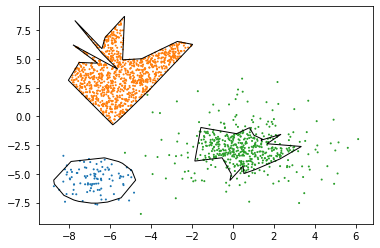

In [95]:
import numpy as np
import matplotlib.path as path
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import polydata

colors = np.array(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

X, y, polygons, centers = polydata.make_poly(n_samples=[100, 1000, 500],
    n_poly=3, dimension=2, outside=[0.1, 0.0, 0.3],
    distribution=['Gaussian', 'Uniform', 'Gaussian'],
    std=[1.0, 1.0, 2.0],
    min_center_distance=2.0,
    max_radius=[2.0, 5.0, 3.0],
    min_radius=[2.0, 0.0, 1.0])
print(polydata.compute_overlap(X, polygons))

ppatches = [patches.PathPatch(p, facecolor='None') for p in polygons]
fig, ax = plt.subplots()
for ppatch in ppatches:
    ax.add_patch(ppatch)
ax.scatter(X[:,0], X[:,1], s=1, color=colors[y])
ax.autoscale_view()
plt.show()

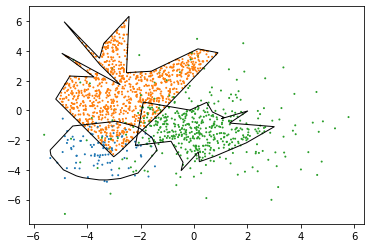

In [96]:
X, polygons = polydata.make_overlap(X, y, polygons, .1, .2)

ppatches = [patches.PathPatch(p, facecolor='None') for p in polygons]
fig, ax = plt.subplots()
for ppatch in ppatches:
    ax.add_patch(ppatch)
ax.scatter(X[:,0], X[:,1], s=1, color=colors[y])
ax.autoscale_view()
plt.show()

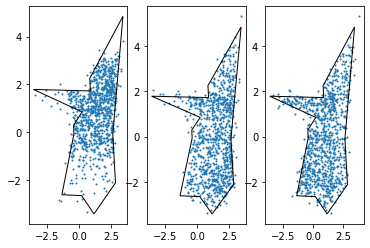

In [97]:
from itertools import combinations

dimensions = 3
p = polydata.random_poly(center=[1,1], n_vertices=12, max_radius=5.0)

X = polydata.sample_poly(1000, p, dimensions, distribution=None, std=1, outside=.1, max_iter=1000)

fig, axes = plt.subplots(1, dimensions)
for ((i,j), k) in zip(combinations(range(dimensions), 2), range(dimensions)):
    axes[k].add_patch(patches.PathPatch(p, facecolor='None'))
    axes[k].scatter(X[:,i], X[:,j], s=1)

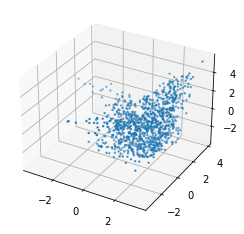

In [98]:
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=2)
plt.show()

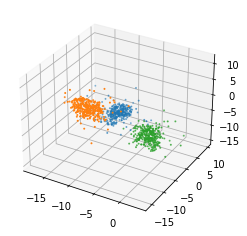

In [99]:
X, y, polygons, centers = polydata.make_poly(n_samples=1000, n_poly=3, dimension=3, distribution='Gaussian', std=3.0, outside=0.1, min_center_distance=1.0, min_radius=1.0, max_radius=5.0)
ax = plt.axes(projection ='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=1, color=colors[y])
ax.autoscale_view()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

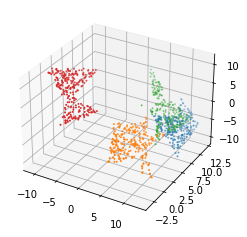

In [100]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

X, y, polygons, centers = polydata.make_poly(n_samples=1000, n_poly=4, max_radius=6.0)

X = polydata.make_correlated_features(X, n_features=1, noise=0.2, random_state=None)

ax.scatter(X[:,0], X[:,1], X[:,2], s=1, color=colors[y])
plt.show

In [101]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import lime.lime_tabular

colors = np.array(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])
features = ['Feature 1', 'Feature 2']
classes = ['Class A', 'Class B']

# Use polydata to generate points
n_samples = 10000
n_polygons = 2
X, y, polygons, centers = polydata.make_poly(n_samples, n_polygons, outside=.2, max_radius=5.0)

# Overlap to customize difficulty
X, polygons = polydata.make_overlap(X, y, polygons, 0.1, 0.2)
print('Overlap: ', polydata.compute_overlap(X, polygons))

Overlap:  0.1453


In [102]:
# Train classifier
train = np.random.randint(X.shape[0], size=1000)

clf = MLPClassifier(max_iter=1000)
clf.fit(X[train], y[train])
score = clf.score(X, y)

print('The neural network score is: ', score)

The neural network score is:  0.8728


The selected point is in Class A


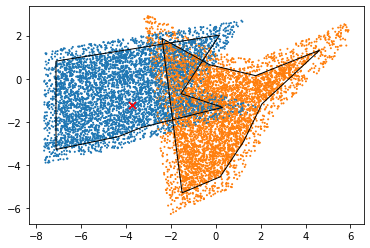

In [106]:
# Use LIME to explain a prediction
explainer = lime.lime_tabular.LimeTabularExplainer(X[train],
  class_names=classes)

i = np.random.randint(0, n_samples)
print('The selected point is in', classes[y[i]])

exp = explainer.explain_instance(X[i], clf.predict_proba, num_features=2, 
                                 top_labels=1)
exp.show_in_notebook()

ppatches = [patches.PathPatch(p, facecolor='None') for p in polygons]

fig, ax = plt.subplots()
for ppatch in ppatches:
    ax.add_patch(ppatch)
ax.scatter(X[:,0], X[:,1], s=1, c=colors[y])
ax.scatter(X[i,0], X[i,1], s=50, c='red', marker='x')
plt.show()

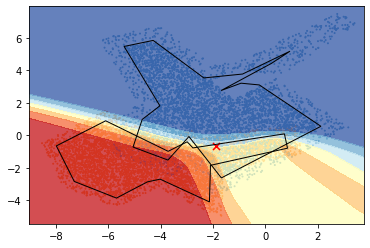

In [ ]:
from matplotlib.colors import ListedColormap
# Visualize the actual decision function
cm = plt.cm.RdYlBu_r

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .2), np.arange(y_min, y_max, .2))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], s=1, c=colors[y])
ppatches = [patches.PathPatch(p, facecolor='None') for p in polygons]
for ppatch in ppatches:
    ax.add_patch(ppatch)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X[i,0], X[i,1], s=50, c='red', marker='x')
plt.show()

The neural network score is:  0.9764
The selected point is in class  1


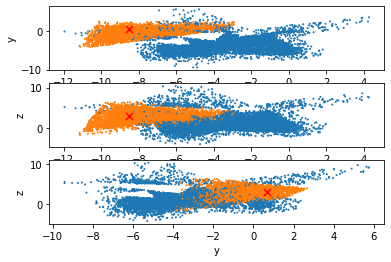

In [110]:
from sklearn.model_selection import train_test_split
features = ['x','y','z']

X, y, polygons, centers = polydata.make_poly(10000, 2, dimension=3, outside=.2, max_radius=8.0, bounding_box=(-5.0, 5.0), random_state=7)

# Train classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = MLPClassifier(max_iter=1000).fit(X_train, y_train)
score = clf.score(X_test, y_test)

print('The neural network score is: ', score)

# Use LIME to explain a prediction
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
    feature_names=features)

ind = np.random.randint(0, X_test.shape[0])
print('The selected point is in class ', y_test[ind])

exp = explainer.explain_instance(X_test[ind], clf.predict_proba, num_features=3, 
                                 top_labels=1)
exp.show_in_notebook()

fig, axes = plt.subplots(3,1)
# for p in polygons:
#     axes[0].add_patch(patches.PathPatch(p, facecolor='None'))
for ((i,j), k) in zip(combinations(range(3), 2), range(3)):
    axes[k].scatter(X[:,i], X[:,j], s=1, c=colors[y])
    axes[k].scatter(X[ind, i], X[ind, j], c='red', s=50, marker='x')
    axes[k].set_xlabel(features[i])
    axes[k].set_ylabel(features[j])

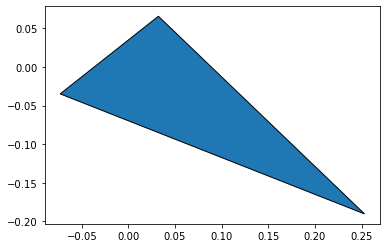

True


In [22]:
import polydata
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
import matplotlib.path as path

p = polydata.random_poly(n_vertices=3, contains_center=True)
ax = plt.subplot()
ax.add_patch(PathPatch(p))
ax.autoscale_view()
plt.show()
print(p.contains_point([0,0]))